In [5]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [6]:
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC,MeltingTemp as MT,molecular_weight as MW, nt_search
from matplotlib import pyplot as plt
from collections import Counter
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


Import Gen Bank File

In [7]:
readData = SeqIO.read("sequence.fasta",'fasta')
seq_ori = readData.seq
seq_a_mini = seq_ori[0:10]
seq_b_mini = seq_ori[10:20]
seq_a = seq_ori[:round(len(seq_ori)/2)]
seq_b = seq_ori[round(len(seq_ori)/2):]


Sequence Analysis

In [8]:
print("meltpoint")
melt_a = MT.Tm_Wallace(seq_a)
melt_b = MT.Tm_Wallace(seq_b)
print(melt_a)
print(melt_b)
print("GC")
GC_A = GC(seq_a)
GC_B = GC(seq_b)
print(GC_A)
print(GC_B)
print("AT")
def AT(seq):
    return len([n for n in seq if n in ("AT")]) / len(seq_a) * 100
print(AT(seq_a))
print("Weight")
w_a = MW(seq_a)
w_b = MW(seq_b)
print(w_a)
print(w_b)

freq_count = Counter(seq_a)
print("Freq A = ", freq_count["T"])

meltpoint
41196.0
41320.0
GC
37.760834670947034
38.18473680690255
AT
62.23916532905297
Weight
4623462.765100301
4617774.464600368
Freq A =  4847


d:\Users\Jackdaw\anaconda3.1\envs\PPE\lib\site-packages\Bio\SeqUtils\__init__.py:146: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  BiopythonDeprecationWarning,


TRANSKRIP and Translate

In [9]:
RNA_a = seq_a.transcribe()
print(RNA_a)
T_RNA_a = RNA_a.translate()
print(T_RNA_a)

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

FIND

In [10]:
print(nt_search(str(seq_a),"ATTA"))

['ATTA', 0, 131, 142, 865, 1033, 1687, 1748, 2065, 2275, 2344, 2479, 2559, 2617, 2928, 3125, 3297, 3382, 3530, 3705, 3708, 4039, 4235, 4339, 4425, 4489, 4514, 4871, 4966, 4993, 5211, 5263, 5360, 5753, 5851, 5957, 5960, 6176, 6487, 6520, 6583, 6600, 6612, 6683, 6764, 6832, 6911, 6949, 6969, 7189, 7339, 7369, 7436, 7657, 7876, 7989, 8359, 8584, 8883, 9145, 9290, 9293, 9740, 9858, 10211, 10459, 10511, 10551, 10651, 10766, 10854, 10863, 10911, 11116, 11251, 11429, 11699, 11788, 12406, 12604, 12678, 12955, 12963, 13062, 13109, 13862, 13903, 13952, 14057, 14149, 14171, 14235, 14549, 14600, 14747, 14794, 14901]


Sequence Aligment

In [11]:
g_aligment = pairwise2.align.globalxx(seq_a_mini,seq_b_mini)
print(format_alignment(*g_aligment[0]))

def hamming(s1,s2):
    return len([(a,b) for (a,b) in zip(s1,s2) if a != b])
print(hamming(seq_a_mini,seq_b_mini))

ATTAA-AGG--TT--
  | | |    ||  
--T-ATA--CCTTCC
  Score=5

8


Mat Plot Lib

Text(0.5, 1.0, 'Melt')

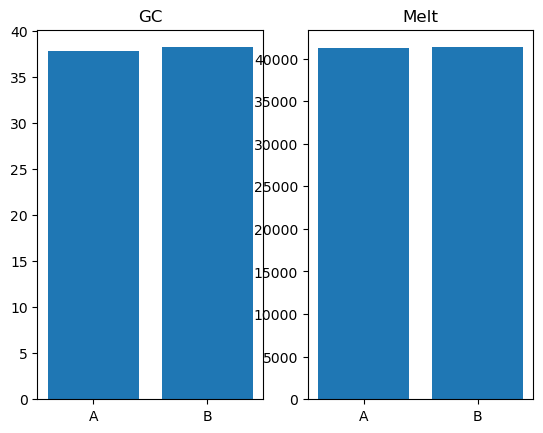

In [33]:
plt.subplot(1,2,1)
plt.bar(["A","B"],[GC_A,GC_B])
plt.title("GC")

plt.subplot(1,2,2)
plt.bar(["A","B"],[melt_a,melt_b])
plt.title("Melt")